# Songs_data_set_Analysis

In [2]:
### Import all the necessary modules for data analysis

In [1]:
import pandas as pd 
import numpy as np 
import requests
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

### Import Song records from the MS Excel for analysis

In [2]:
df = pd.read_excel("./excel_files/python_songs_data_v2.xlsx")
df

,song_id,title,artist,album,year_released,duration,tempo,loudness
0,1,08:00:00,Intars Busulis,Kino,0,208.16934,140.029,-3.698
1,2,09:02:00,Aftermath,Tides of Sorrow,0,376.89424,87.006,-4.605
2,3,1,Cocoa Tea,Kingston Hot,1992,228.96281,115.862,-11.627
3,4,3,Britney Spears,3,2009,465.47546,131.999,-6.278
4,5,3,DJ X-Change,The X-Files 5.0,0,244.08771,136.993,-6.072
...,...,...,...,...,...,...,...,...
9995,9996,Zuo Li Bu An,Tanya Chua,Amphibian,0,254.24934,147.892,-6.217
9996,9997,Zurezko Olerkia,Varios,Luis de Pablo - Zurezko olerkia (Poema de madera),0,168.28036,100.929,-25.431
9997,9998,Zydeco In D-Minor,"Myrick ""Freeze"" Guillory",Nouveau Zydeco,0,300.82567,137.663,-12.574
9998,9999,1,Jim Reeves,The International Jim Reeves/ Good 'N' Country,2000,151.58812,91.632,-14.547


In [3]:
# Confirming if the dataframe is empty
df.empty

False

In [4]:
# Checking the first 10 records of the dataframe
# df[:10]
df.head(10)

,song_id,title,artist,album,year_released,duration,tempo,loudness
0,1,08:00:00,Intars Busulis,Kino,0,208.16934,140.029,-3.698
1,2,09:02:00,Aftermath,Tides of Sorrow,0,376.89424,87.006,-4.605
2,3,1,Cocoa Tea,Kingston Hot,1992,228.96281,115.862,-11.627
3,4,3,Britney Spears,3,2009,465.47546,131.999,-6.278
4,5,3,DJ X-Change,The X-Files 5.0,0,244.08771,136.993,-6.072
5,6,40,U2,Live From Paris,1992,406.85669,146.826,-8.539
6,7,124,Photek,Modus Operandi,1997,421.19791,161.772,-10.611
7,8,1492,Scarlet's Remains,Scarlet's Remains,2005,215.90159,170.702,-8.039
8,9,1969,Iggy And The Stooges,Telluric Chaos,1969,220.78649,231.089,-8.943
9,10,1987,2 Minutos,Postal '97,1997,64.39138,186.495,42.000


In [5]:
# Checking how many records and columns we imported
df.shape

(10000, 8)

In [6]:
# Use the info() function to check the data structure of your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   song_id        10000 non-null  int64  
 1   title          9999 non-null   object 
 2   artist         10000 non-null  object 
 3   album          10000 non-null  object 
 4   year_released  10000 non-null  int64  
 5   duration       10000 non-null  float64
 6   tempo          10000 non-null  float64
 7   loudness       10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [7]:
df.describe()

,song_id,year_released,duration,tempo,loudness
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,936.863200,240.622038,122.868249,-10.471201
std,2886.89568,996.749564,246.084090,35.277906,5.447648
min,1.00000,0.000000,1.044440,-34.780000,-51.643000
25%,2500.75000,0.000000,176.032200,96.949250,-13.159000
50%,5000.50000,0.000000,223.059140,120.150500,-9.377000
75%,7500.25000,2000.000000,276.375060,144.006750,-6.530000
max,10000.00000,2010.000000,22050.000000,262.828000,42.000000


In [8]:
# [int8: -128 to 127]; [unint8: 0 to 255]; [int16: -32,768 to 32,767]; [uint16: 0 to 65,537]
# [int32: -2,147,483,648 to-2,147,483,647]; [unint32: 0 to 4,294,967,296]; 
# [int64: -9,223,372,036,854,776 to -9,223,372,036,854,775]; [uint64: 0 to 18,446,744,073,709,551,616]
# [float8, float16, float32, float32, float64] follows similar pattern but no unsigned float [unfloat]

In [9]:
df.columns

Index(['song_id', 'title', 'artist', 'album', 'year_released', 'duration',
       'tempo', 'loudness'],
      dtype='object')

In [10]:
# check for empty records
df.isna().sum()

song_id          0
title            1
artist           0
album            0
year_released    0
duration         0
tempo            0
loudness         0
dtype: int64

In [11]:
# fill the null values in the title column with unkown values
df["title"].fillna("Unknown", inplace = True) 
# confirm records
df.isna().sum()

song_id          0
title            0
artist           0
album            0
year_released    0
duration         0
tempo            0
loudness         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   song_id        10000 non-null  int64  
 1   title          10000 non-null  object 
 2   artist         10000 non-null  object 
 3   album          10000 non-null  object 
 4   year_released  10000 non-null  int64  
 5   duration       10000 non-null  float64
 6   tempo          10000 non-null  float64
 7   loudness       10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [13]:
# Applying the right datatypes to each columns
string_list = ['title', 'artist', 'album']
for header in string_list:
    df[header] =  df[header].astype('string')
    
integer_list = ['song_id', 'year_released']
for header in integer_list:
    df[header] =  df[header].astype('int16')

float_list = ['duration', 'tempo','loudness']
for header in float_list:
    df[header] =  df[header].astype('float16')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   song_id        10000 non-null  int16  
 1   title          10000 non-null  string 
 2   artist         10000 non-null  string 
 3   album          10000 non-null  string 
 4   year_released  10000 non-null  int16  
 5   duration       10000 non-null  float16
 6   tempo          10000 non-null  float16
 7   loudness       10000 non-null  float16
dtypes: float16(3), int16(2), string(3)
memory usage: 332.2 KB


In [14]:
# Songs with year of release equal to zero are erroneous, using pandas inbuilt function, 
# how many songs have  incorrect year of release?
# a total of 5309 records of zero years which are erroneous

# Setting the condition
invalid_yr = df['year_released']== 0

# Counting the year based on the condition
df['year_released'][invalid_yr].count()


np.int64(5309)

In [15]:
# checking all the years based on the condition zero
df['year_released'].value_counts()

year_released
0       5309
2006     320
2005     304
2007     285
2004     270
        ... 
1936       1
1950       1
1920       1
1955       1
1957       1
Name: count, Length: 73, dtype: int64

In [16]:
# investigating the unique years value
df['year_released'].unique()

array([   0, 1992, 2009, 1997, 2005, 1969, 1920, 2007, 2008, 2010, 1995,
       1970, 1959, 1964, 1983, 1985, 1981, 2000, 2001, 2004, 1996, 1994,
       1998, 2003, 2002, 2006, 1987, 1976, 1977, 1999, 1934, 1993, 1990,
       1989, 1984, 1963, 1967, 1986, 1974, 1961, 1966, 1973, 1968, 1991,
       1960, 1988, 1972, 1979, 1982, 1956, 1924, 1978, 1980, 1971, 1975,
       1965, 1925, 1953, 1923, 1935, 1940, 1958, 1926, 1954, 1962, 1927,
       1929, 1930, 1936, 1950, 1947, 1955, 1957], dtype=int16)

In [17]:
# extracting the first five records to confirm it
df[['song_id' ,'title', 'artist', 'album', 'year_released']][invalid_yr][:5]

,song_id,title,artist,album,year_released
0,1,08:00:00,Intars Busulis,Kino,0
1,2,09:02:00,Aftermath,Tides of Sorrow,0
4,5,3,DJ X-Change,The X-Files 5.0,0
10,11,4/20/2002,Pearl Jam,Lost Dogs,0
11,12,6 6 2006,Ziggy Marley And The Melody Makers,Hey World,0


In [18]:
# The loudness of a song must be less than zero. The closer the value is to zero, 
# the louder the song. How many songs have loudness greater than  or equal to zero?

print(f"Minimum value for loudness: {df['loudness'].min()}") 
print(f"Maximum value for loudness: {df['loudness'].max()}") 

Minimum value for loudness: -51.65625
Maximum value for loudness: 42.0


In [19]:
# there are 6 outcomes of loudness greater than equal to zero
# Setting the condition
invalid_loudness= df['loudness'] >= 0
# Counting the year based on the condition
df['loudness'][invalid_loudness].count()
#df[df['loudness'] >= 0].count()

np.int64(6)

In [20]:
# extracting the first five records to confirm it
df[['song_id' ,'title', 'artist', 'album', 'loudness']][invalid_loudness].head(8)

,song_id,title,artist,album,loudness
9,10,1987,2 Minutos,Postal '97,42.000000
12,13,94496,GAPteborgs Symfoniker / Neeme JA$?rvi,"Tchaikovsky: Overture ""1812",0.000000
1409,1410,Check 1_2,EPMD,Out Of Business,36.000000
1471,1472,Chuckanut Drive,Power Pill Fist,Kongmanivong,0.565918
4122,4123,Intro,Styles P,The Ghost In the Machine,0.000000
4156,4157,Is It A Myth?,K'Naan,The Dusty Foot On The Road,4.000000


In [21]:
# The tempo of a song cannot be zero, How many songs have a tempo of zero?

print(f"Minimum value for tempos: {df['tempo'].min()}") 
print(f"Maximum value for tempos: {df['tempo'].max()}") 
# df[df['tempo'] <= 0].count()

Minimum value for tempos: -34.78125
Maximum value for tempos: 262.75


In [22]:
# Checking how many records with tempo <= 0
# which contains 28 records

# Setting the condition
invalid_tempo= df['tempo'] <= 0

# Counting the year based on the condition
df['year_released'][invalid_tempo].count()


np.int64(28)

In [23]:
# extracting the first five records to confirm it
df[['song_id' ,'title', 'artist', 'album', 'tempo']][invalid_tempo].head()

,song_id,title,artist,album,tempo
21,22,(Coming With) Loving on My Mind,Tony Mathews,Alien in My Own Home,0.00000
51,52,10000 Km,La Portuaria,10000 Km,-34.78125
276,277,Afraid Of Change (Tribal Vocal Mix),Casa Bulga,Afraid Of Change,0.00000
346,347,Alchemy Index Vol 1 _x0013_ Water 1 of 6,Thrice,The Alchemy Index: Vols 1 & 2 Fire & Water,0.00000
397,398,All Purpose Experiment,Controlled Dissonance,For A Few Dollars More,0.00000


In [24]:
# Using the panda's drop function, delete all the songs with year = 0
# Deleting the records with invalid year value
df.drop(df[invalid_yr].index,inplace=True)
# Confirming the deletion
df['year_released'][invalid_yr].count()


np.int64(0)

In [25]:
# Using the panda's drop function, delete all the songs with tempo <= 0

# Deleting the records with invalid tempo values
df.drop(df[invalid_tempo].index, inplace=True)

# Confirming the deletion
df['tempo'][invalid_tempo].count()

np.int64(0)

In [26]:
# Using the panda's drop function, delete all the songs with loudness >= 0

# Deleting the records with invalid loudness values
df.drop(df[invalid_loudness].index, inplace=True)

# Confirming the deletion
df['loudness'][invalid_loudness].count()

np.int64(0)

In [27]:
# check all deletion process
df.describe()

,song_id,year_released,duration,tempo,loudness
count,4674.000000,4674.000000,4674.000000,4674.000000,4674.000000
mean,5037.142276,1997.141421,inf,inf,-9.679688
std,2899.776136,11.910012,99.375000,34.718750,5.113281
min,3.000000,1920.000000,7.132812,30.828125,-51.656250
25%,2536.250000,1993.000000,181.125000,98.937500,-12.162109
50%,5057.500000,2001.000000,227.250000,122.406250,-8.585938
75%,7581.250000,2006.000000,278.250000,146.625000,-5.981445
max,9999.000000,2010.000000,1598.000000,258.750000,-1.216797


In [28]:
# confirming the year of  release is not in zeros
df['year_released'].value_counts()

year_released
2006    320
2005    302
2007    284
2004    269
2003    253
       ... 
1925      1
1934      1
1924      1
1920      1
1957      1
Name: count, Length: 72, dtype: int64

In [29]:
# confirming the dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4674 entries, 2 to 9998
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   song_id        4674 non-null   int16  
 1   title          4674 non-null   string 
 2   artist         4674 non-null   string 
 3   album          4674 non-null   string 
 4   year_released  4674 non-null   int16  
 5   duration       4674 non-null   float16
 6   tempo          4674 non-null   float16
 7   loudness       4674 non-null   float16
dtypes: float16(3), int16(2), string(3)
memory usage: 191.7 KB


In [30]:
#create a pivot table from dataframe by modifying the below code but using:

pd.pivot_table(df,index='year_released',values='loudness',  aggfunc='mean') 

,loudness
year_released,
1920,-4.953125
1923,-5.265625
1924,-10.703125
1925,-6.707031
1926,-21.671875
...,...
2006,-8.347406
2007,-7.997386
2008,-7.912718


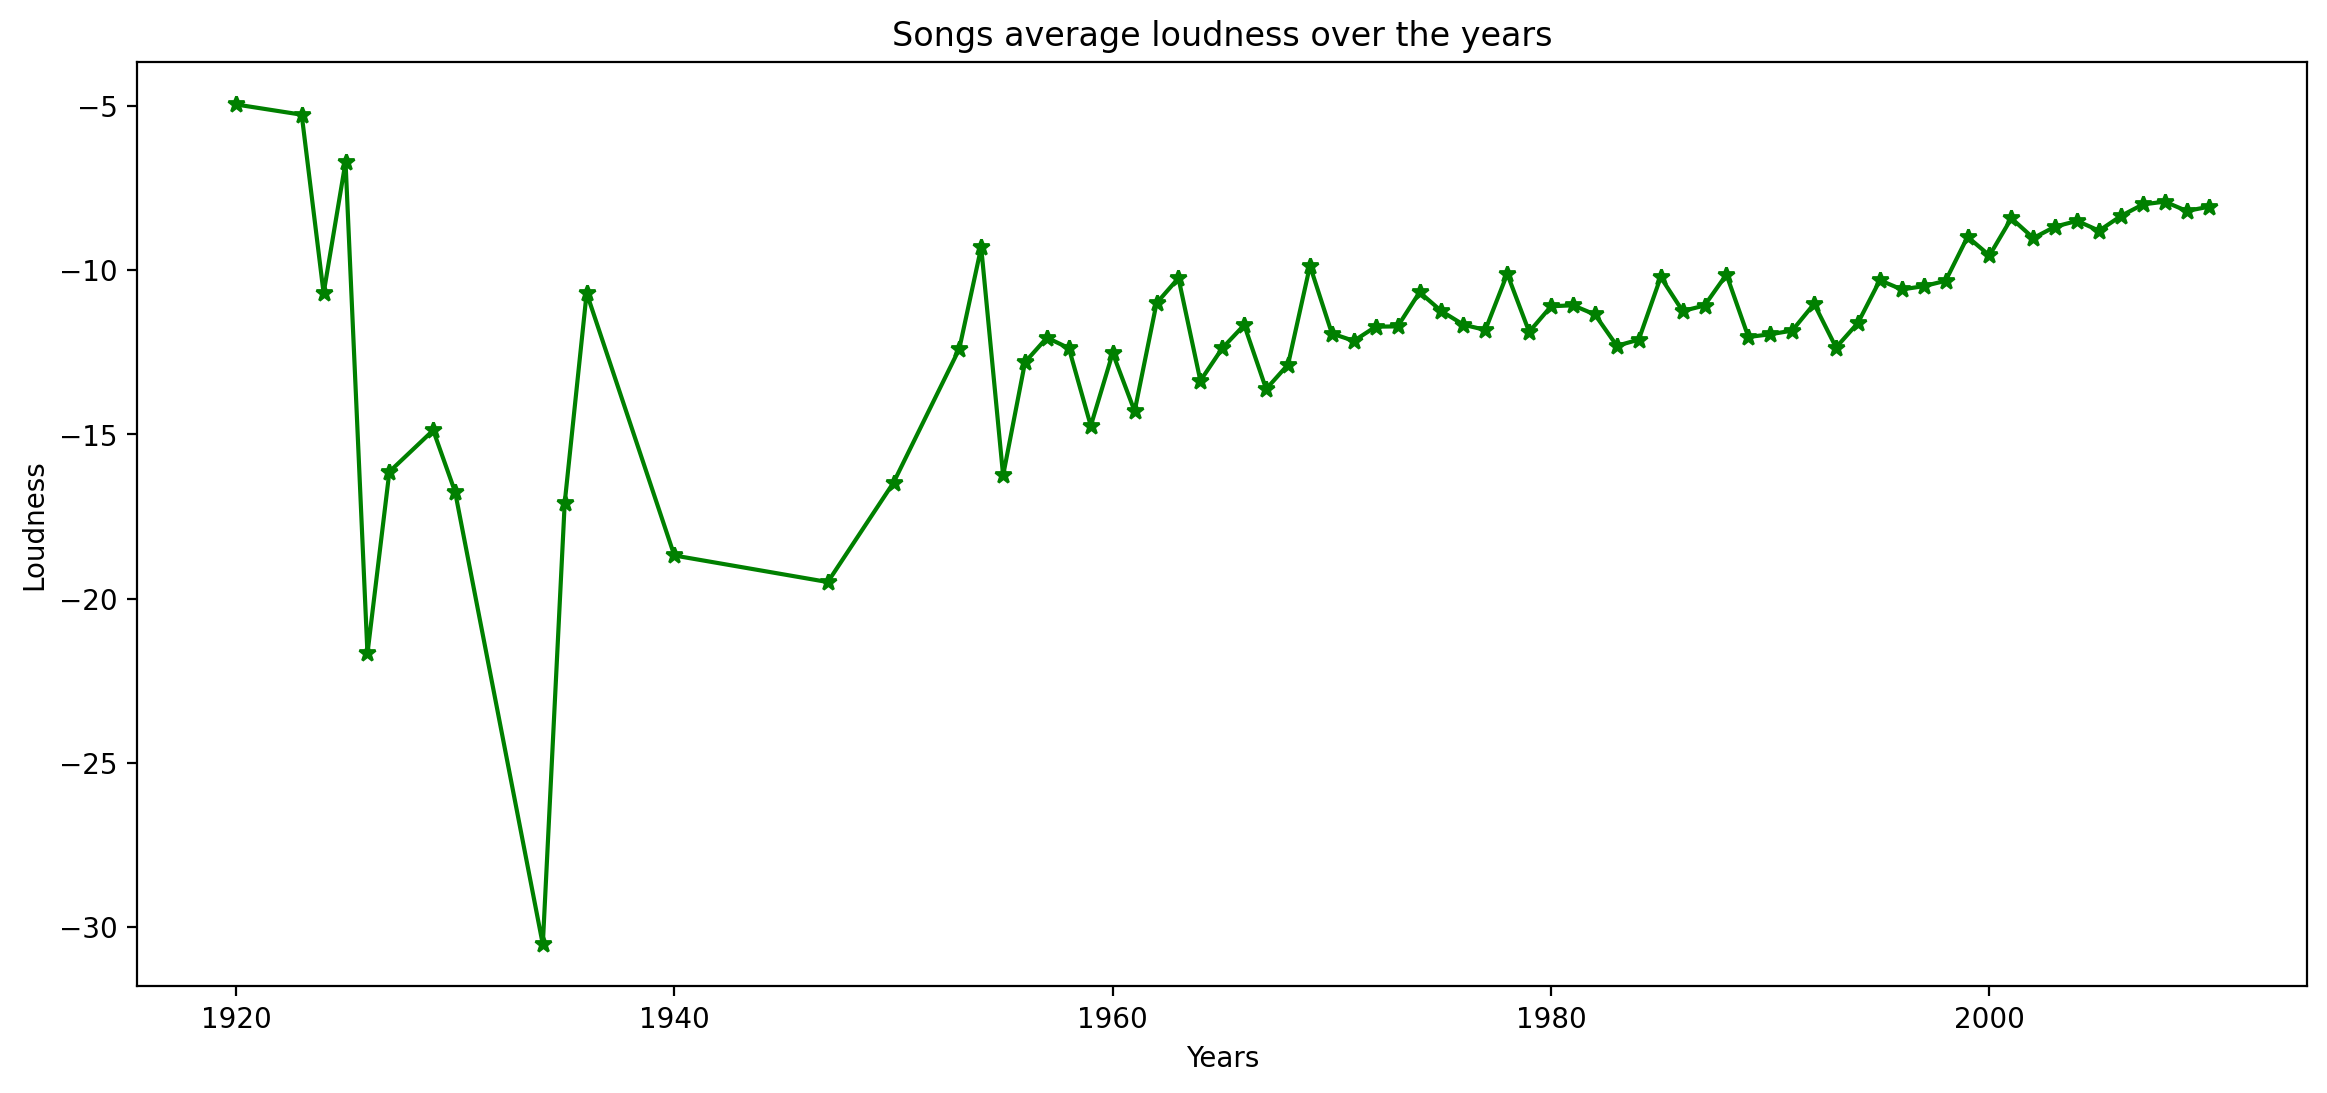

In [31]:
# Using matplotlib, draw a line graph of the year against the average loudness
import matplotlib.pyplot as plt
pivot_table = pd.pivot_table(df,index='year_released',values='loudness',  aggfunc='mean') 
plt.figure(figsize=(14,6),dpi=200)
plt.plot(pivot_table['loudness'],color='green',marker='*',linestyle='-')
plt.xlabel('Years')
plt.ylabel('Loudness')
plt.title('Songs average loudness over the years')
plt.savefig("Songs_average_loudness_over_the_years.png", dpi=300, bbox_inches="tight")


In [32]:
#investigating the year with the highest no of songs
songs_per_year = df.groupby("year_released").size().to_frame("count")
songs_per_year.head()

,count
year_released,
1920,1
1923,1
1924,1
1925,1
1926,2


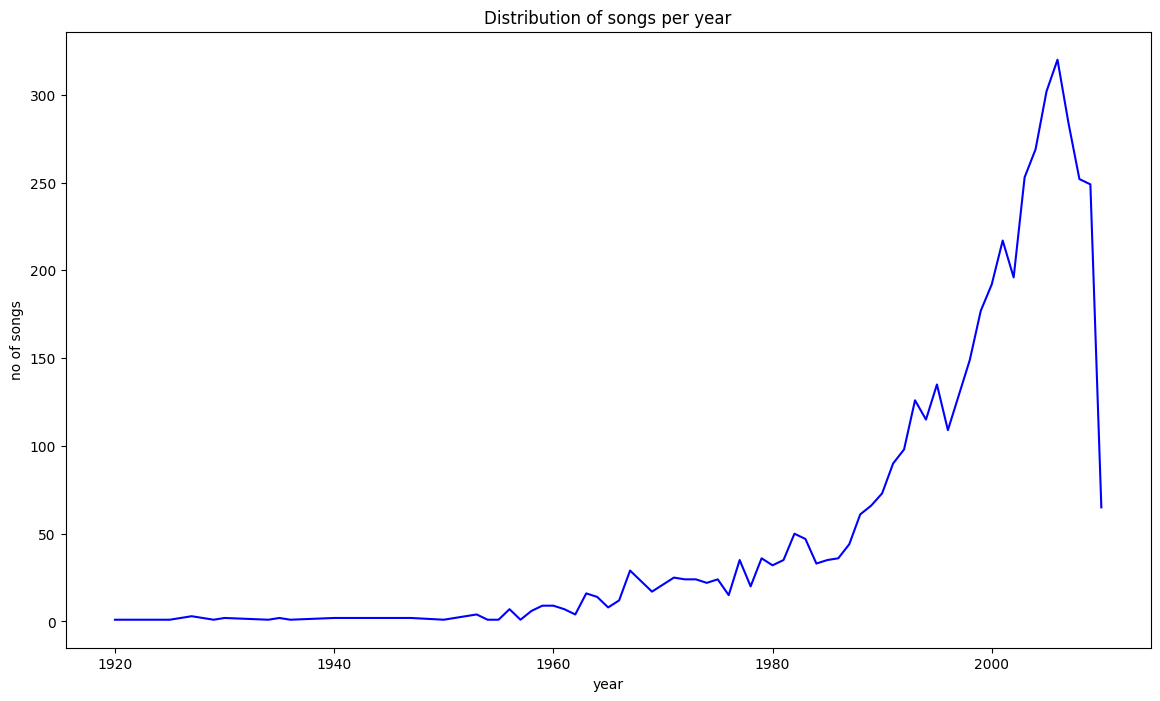

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 8))
x= songs_per_year.index
y= songs_per_year["count"]
plt.xlabel("year")
plt.ylabel("no of songs")
plt.title("Distribution of songs per year")
plt.plot(x,y,color = 'blue')
plt.savefig("Distribution_of_songs_per_year.png", dpi=300, bbox_inches="tight")
plt.show()

In [35]:
# Save the clean song datafram as an excel file

try:
    df.to_excel("Cleaned_pysongs.xlsx",index=False)
except:
    print("Error: Unable to convert dataframe to a excel file")
else:
    print("The Excel file successfully created.")

The Excel file successfully created.
